# Anisotropy function fit

The following anisotropy function for iron was obtained from Liu et.al (2013)

$$a_c(\hat{n}) = 1 + \epsilon_1 \big( \sum_{i=1}^3 n_i^4 -3/5\big) + \epsilon_2 \big( \sum_{i=1}^3 n_i^4 + 66n_1^2n_2^2n_3^2 + 17/7\big)$$

Where MD simulations were used to give $\epsilon_1 = 0.035$ and $\epsilon_2 = 0.001$

Our aim here is to find a value for $\zeta$ such that the function

$$a_c(\hat{n}) = 1 - \zeta \big( 3 - 4 \sum_{i=1}^3 n_i^4\big)$$

best approximated the previously stated anisortopy function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fitting anisotropy functions

In [8]:
def anisotropy_paper(n):
    
    e1 = 0.035
    e2 = 0.001
    
    return 1+ e1*(np.sum(np.power(n,4)) - 3/5) + e2*(3*np.sum(np.power(n,4)) + 66*np.power(np.prod(n),2) - 17/7)

def anisotropy_fit(n,zeta):
    
    return 1 - zeta*(3-4*np.sum(np.power(n,4)))

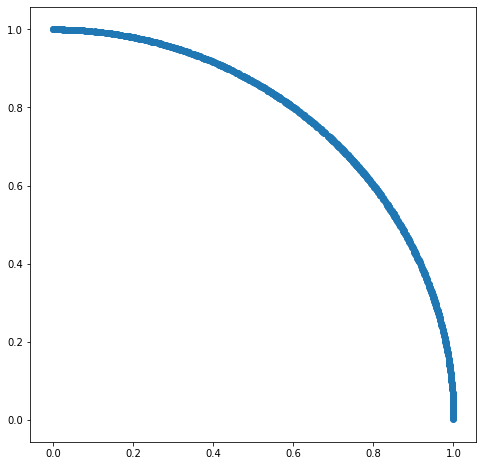

In [19]:
n = 1000 # number of pts
d = 2    # dimensions

randoms = np.random.random((n,d))
normals = np.zeros((n,d))

# Unit vectorize

for i in range(n):
    
    normals[i] = randoms[i]/np.linalg.norm(randoms[i])
    

fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(normals[:,0],normals[:,1])

In [30]:
def cost_function(zeta):
    
    fit_vals = np.apply_along_axis(anisotropy_fit,1,normals,zeta=zeta)
    paper_vals = np.apply_along_axis(anisotropy_paper,1,normals)
    
    return np.sum(np.power(fit_vals - paper_vals,2))

In [31]:
zetas = np.linspace(-0.01,0.01,100)

costs = np.zeros(len(zetas))

for i in range(len(zetas)):
    
    costs[i] = cost_function(zetas[i])

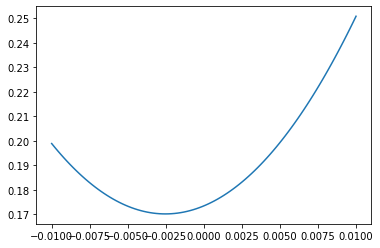

In [32]:
plt.plot(zetas,costs)

In [35]:
zetas[np.argmin(costs)]

-0.002525252525252526

In [38]:
# So, we see that the zeta we want is around 0.0025. Let's plot close to this

zetas = np.linspace(-0.0026,-0.0025,100)

costs = np.zeros(len(zetas))

for i in range(len(zetas)):
    
    costs[i] = cost_function(zetas[i])

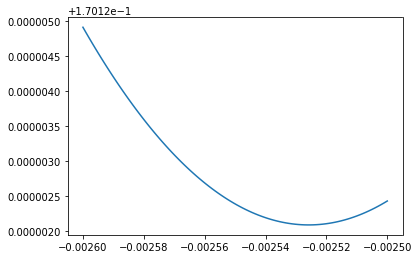

In [39]:
plt.plot(zetas,costs)

In [40]:
zetas[np.argmin(costs)]

-0.0025262626262626264

So we take $\zeta = -0.0025$